In [14]:
import numpy as np
import matplotlib.pyplot as plt
import math
pi = math.pi

In [15]:
# total number of layers = 4
num_layers = 4

# width of each layer
H = np.array([200,10,20,20])

# velocity of seismic wave in each layer
V = np.array([1000,1500,2000,1600,2500])

# Amplitude of source signal (0.0 to 1.0), (1.0 to -1.0), (-1.0 to 0.0)
source_amplitudes = np.concatenate((np.arange(0.0,1.0,0.1),np.arange(1.0,-1.0,-0.1), np.arange(-1.0,0.1,0.1),),axis=0)

# Sampling time interval
delta_t = 0.001

# number of samples in source signal
num_samples = len(source_amplitudes)

# time period (in seconds)
T = delta_t*(num_samples-1)

# signal frequency
F = int(1/T)

# Quality Factors
Q = np.array([200,250,300,250,1000])

# Attenuation Coeffiecients (alpha)
attenuation_coef = (pi*F)/(Q*V)

# creating time sequence from 0.0s upto 0.6s, time-interval = 0.001s
time_seq = np.arange(0.0,2.0,delta_t)

In [16]:
# calculating Reflection and Transmission Coefficeints
reflection_coef = []
transmission_coef = []

for i in range(num_layers):
    v1=V[i]
    v2=V[i+1]
    rc = (v2-v1)/(v2+v1)
    rc = round(rc,3)
    tc = round(1-rc,3)
    
    reflection_coef.append(rc)
    transmission_coef.append(tc)

# calculating Two-way Travel times
two_way_travel_times = []
t=0
for i in range(num_layers):
    t+= 2*(H[i]/V[i])
    t=round(t,3)
    two_way_travel_times.append(t)

# Calculating Attenuation factors = e^(-alpha*t), for reflections from each layer
attenuation_factors = []
factor = 1
for i in range(num_layers):
    t = 2*(H[i]/V[i])
    t = round(t,3)
    alpha = attenuation_coef[i]
    factor = factor * np.exp(-alpha*t)
    attenuation_factors.append(factor)

In [17]:
# function for creating synthetic signal response of layer at given index
def generate_signal(index,factor):
    cur_signal = [0]*len(time_seq)
    for a in source_amplitudes:
        cur_signal[index] = a*factor
        index+=1
    return np.array(cur_signal)

In [18]:
# Calculating Primary Reflections from each layer without Attenuation
synthetic_signal = []
tc_factor = 1
for i in range(num_layers):
    twtt = two_way_travel_times[i]
    rc = reflection_coef[i]
    tc = transmission_coef[i]
    index = int(twtt/delta_t)
    cur_signal = generate_signal(index,rc*tc_factor)
    synthetic_signal.append(cur_signal)
    tc_factor = tc_factor * tc * (2-tc)
    # tc - for downward direction
    # (2-tc) - for upward direction
synthetic_signal = np.array(synthetic_signal)

In [19]:
# Calculating Primary Reflections from each layer with Attenuation
attenuated_signals = []
for i in range(num_layers):
    cur_signal = attenuation_factors[i] * synthetic_signal[i]
    attenuated_signals.append(cur_signal)

attenuated_signals = np.array(attenuated_signals)
attenuated_signals.shape

(4, 2000)

In [20]:
# Function for Plotting Seismic Reflections and Complete Seismogram

def plot_seismogram(time,reflections):
    num_reflections = len(reflections)
    complete_seismogram = np.sum(reflections,axis=0)
    
    plt.figure(figsize=(8,8))
    for i in range(num_reflections):
        plt.subplot(num_reflections+1, 1, i+1)
        plt.plot(time,reflections[i])
        plt.xlim([0,0.6])
        plt.ylim([-0.3,0.3])
        plt.xlabel('time')
        plt.ylabel(f"Reflection from \nLayer {i+1}")
    
    plt.subplot(num_reflections+1, 1, num_reflections+1)
    plt.plot(time,complete_seismogram)
    plt.xlim([0,0.6])
    plt.ylim([-0.3,0.3])
    plt.xlabel('time')
    plt.ylabel(f"Complete Seismogram")
    plt.show()

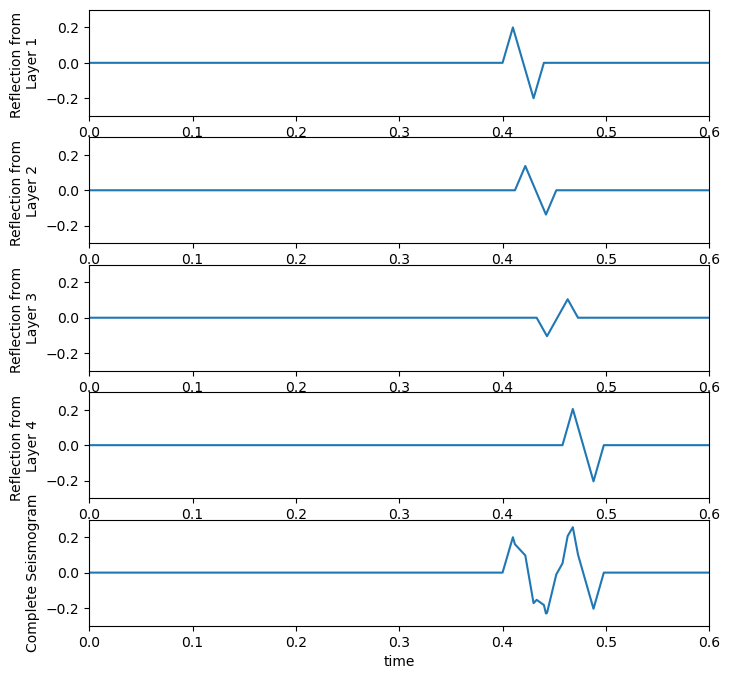

In [21]:
# Plotting Seismogram without Attenuation
plot_seismogram(time_seq,synthetic_signal)

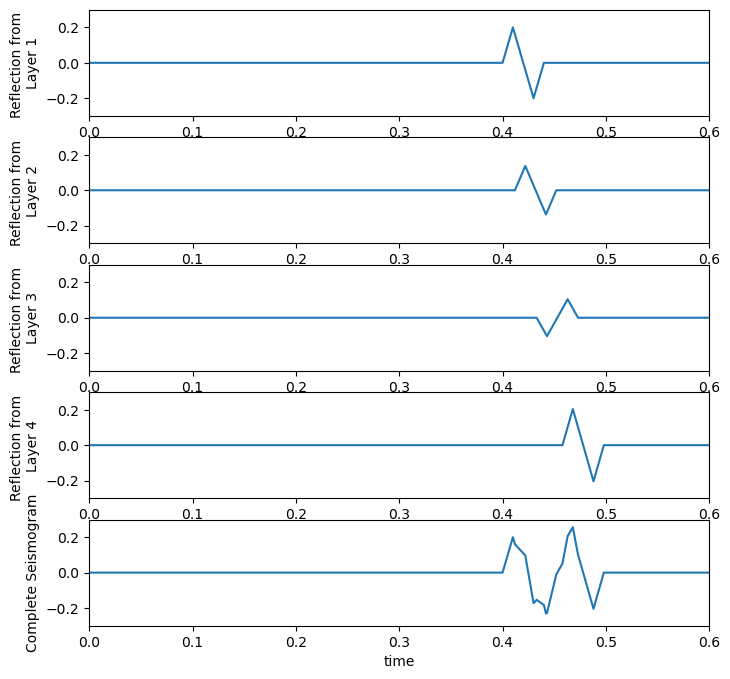

In [22]:
# Plotting Seismogram with Attenuation
plot_seismogram(time_seq,attenuated_signals)